In [1]:
import os,glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.models import Model
from keras.layers import *
from keras.callbacks import Callback, EarlyStopping
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
from sklearn.metrics import classification_report

2023-08-30 07:38:44.172091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 07:38:44.240914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 07:38:44.241715: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 07:38:45.892531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
file_path = '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train'
fie_path_for_test= '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/test'
file_path_for_valid = '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/valid'

In [3]:
name_class = os.listdir(file_path)
name_class

['melanoma', 'seborrheic_keratosis', 'nevus']

In [20]:
filepaths = list(glob.glob(file_path+'/**/*.*'))
filepaths_for_test = list(glob.glob(fie_path_for_test+'/**/*.*'))
filepaths_for_valid = list(glob.glob(file_path_for_valid+'/**/*.*'))

In [5]:
filepaths

['/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0013861.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0010863.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0012988.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0014360.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0015082.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0014324.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0001103.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0010194.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0013610.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_0000056.jpg',
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train/melanoma/ISIC_00

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [21]:
labels_for_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_for_test))
labels_for_test

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [22]:
labels_for_valid = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_for_valid))
labels_for_valid

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrheic_keratosis',
 'seborrhe

In [7]:
filepath= pd.Series(filepaths, name='Filepath').astype(str)
label = pd.Series(labels, name='Label')
data = pd.concat([filepath, label],axis=1)
data = data.sample(frac=1).reset_index(drop = True)
data.head()

,Filepath,Label
0,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
1,/home/zuhaib/Desktop/Lession Lab version 2/ski...,melanoma
2,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
3,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
4,/home/zuhaib/Desktop/Lession Lab version 2/ski...,melanoma


In [26]:
filepath_for_test= pd.Series(filepaths_for_test, name='Filepath').astype(str)
label_for_test = pd.Series(labels_for_test, name='Label')
data_for_test = pd.concat([filepath_for_test, label_for_test],axis=1)
data_for_test = data_for_test.sample(frac=1).reset_index(drop = True)
data_for_test.head()

,Filepath,Label
0,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
1,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
2,/home/zuhaib/Desktop/Lession Lab version 2/ski...,melanoma
3,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
4,/home/zuhaib/Desktop/Lession Lab version 2/ski...,melanoma


In [27]:
filepath_for_valid= pd.Series(filepaths_for_valid, name='Filepath').astype(str)
label_for_valid = pd.Series(labels_for_valid, name='Label')
data_for_valid = pd.concat([filepath_for_valid, label_for_valid],axis=1)
data_for_valid = data_for_valid.sample(frac=1).reset_index(drop = True)
data_for_valid.head()

,Filepath,Label
0,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
1,/home/zuhaib/Desktop/Lession Lab version 2/ski...,seborrheic_keratosis
2,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
3,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus
4,/home/zuhaib/Desktop/Lession Lab version 2/ski...,nevus


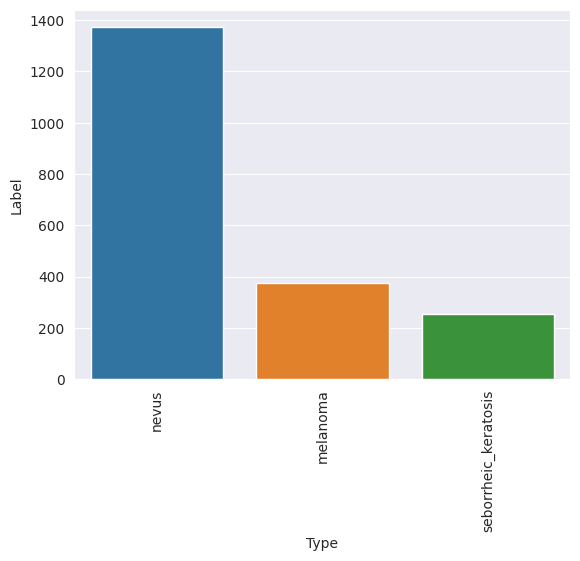

In [8]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation = 90);

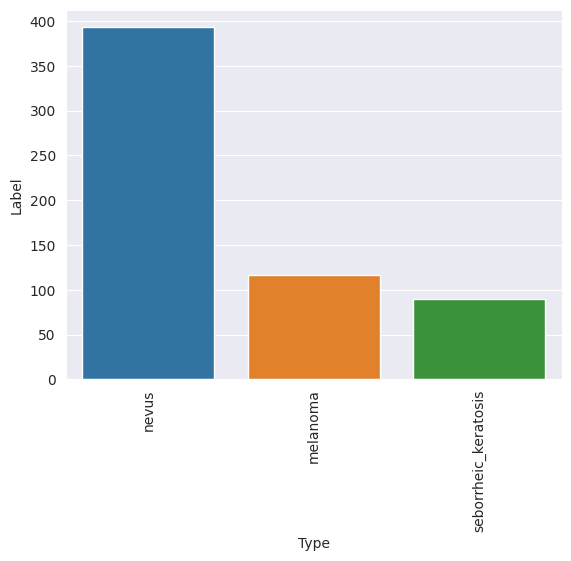

In [28]:
#for test
counts = data_for_test.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation = 90);

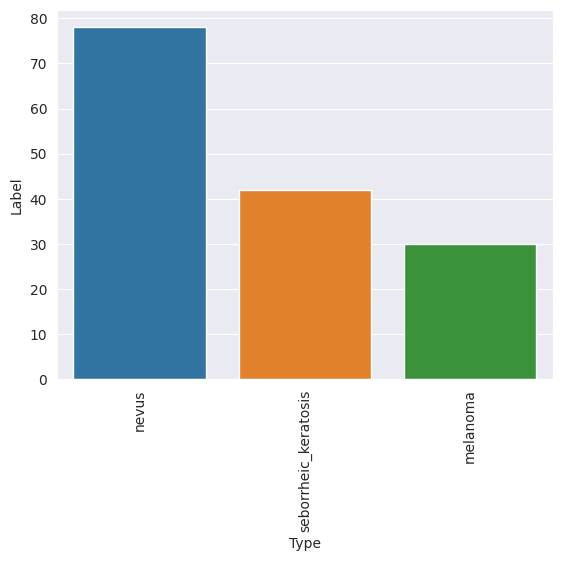

In [29]:
#for valid
counts = data_for_valid.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation = 90);

In [36]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   preprocessing_function = preprocess_input
     
 )

test_datagen = ImageDataGenerator(rescale = 1./255,preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(rescale = 1./255,preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/train',
 target_size=(100,100),
 batch_size=batch_size,
 class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/test',
 target_size=(100,100),
 batch_size=batch_size,
 class_mode='categorical'
)


valid_generator = test_datagen.flow_from_directory(
 '/home/zuhaib/Desktop/Lession Lab version 2/skin-lesions/valid',
 target_size=(100,100),
 batch_size=batch_size,
 class_mode='categorical'
)

Found 2000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [32]:
pretrained_model = ResNet50(
 input_shape=(100,100,3),
 include_top=False,
 weights='imagenet',
 pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 28s 0us/step


In [33]:
inputs = pretrained_model.input

x= Dense(128, activation='relu')(pretrained_model.output)
x= Dense(128,activation='softmax')(x)

outputs = Dense(3,activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [34]:
model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)

In [35]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=2,
                               mode='auto')]

In [38]:
history = model.fit_generator(
 train_generator,
 validation_data= valid_generator,
 epochs = 100,
 callbacks=my_callbacks
)

/tmp/ipykernel_47539/1016682973.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100


2023-08-30 08:39:47.863112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 321s 5s/step - loss: 0.8739 - accuracy: 0.6860 - val_loss: 1.0343 - val_accuracy: 0.5200
Epoch 2/100
63/63 [==============================] - 368s 6s/step - loss: 0.8587 - accuracy: 0.6860 - val_loss: 1.0435 - val_accuracy: 0.5200
Epoch 3/100
63/63 [==============================] - 387s 6s/step - loss: 0.8491 - accuracy: 0.6860 - val_loss: 1.0533 - val_accuracy: 0.5200
